In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv('KNNAlgorithmDataset.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
dataset = pd.get_dummies(data=dataset, drop_first=True, columns=['diagnosis'])
dataset.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)
dataset.isnull().sum()


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_M                0
dtype: int64

<AxesSubplot: >

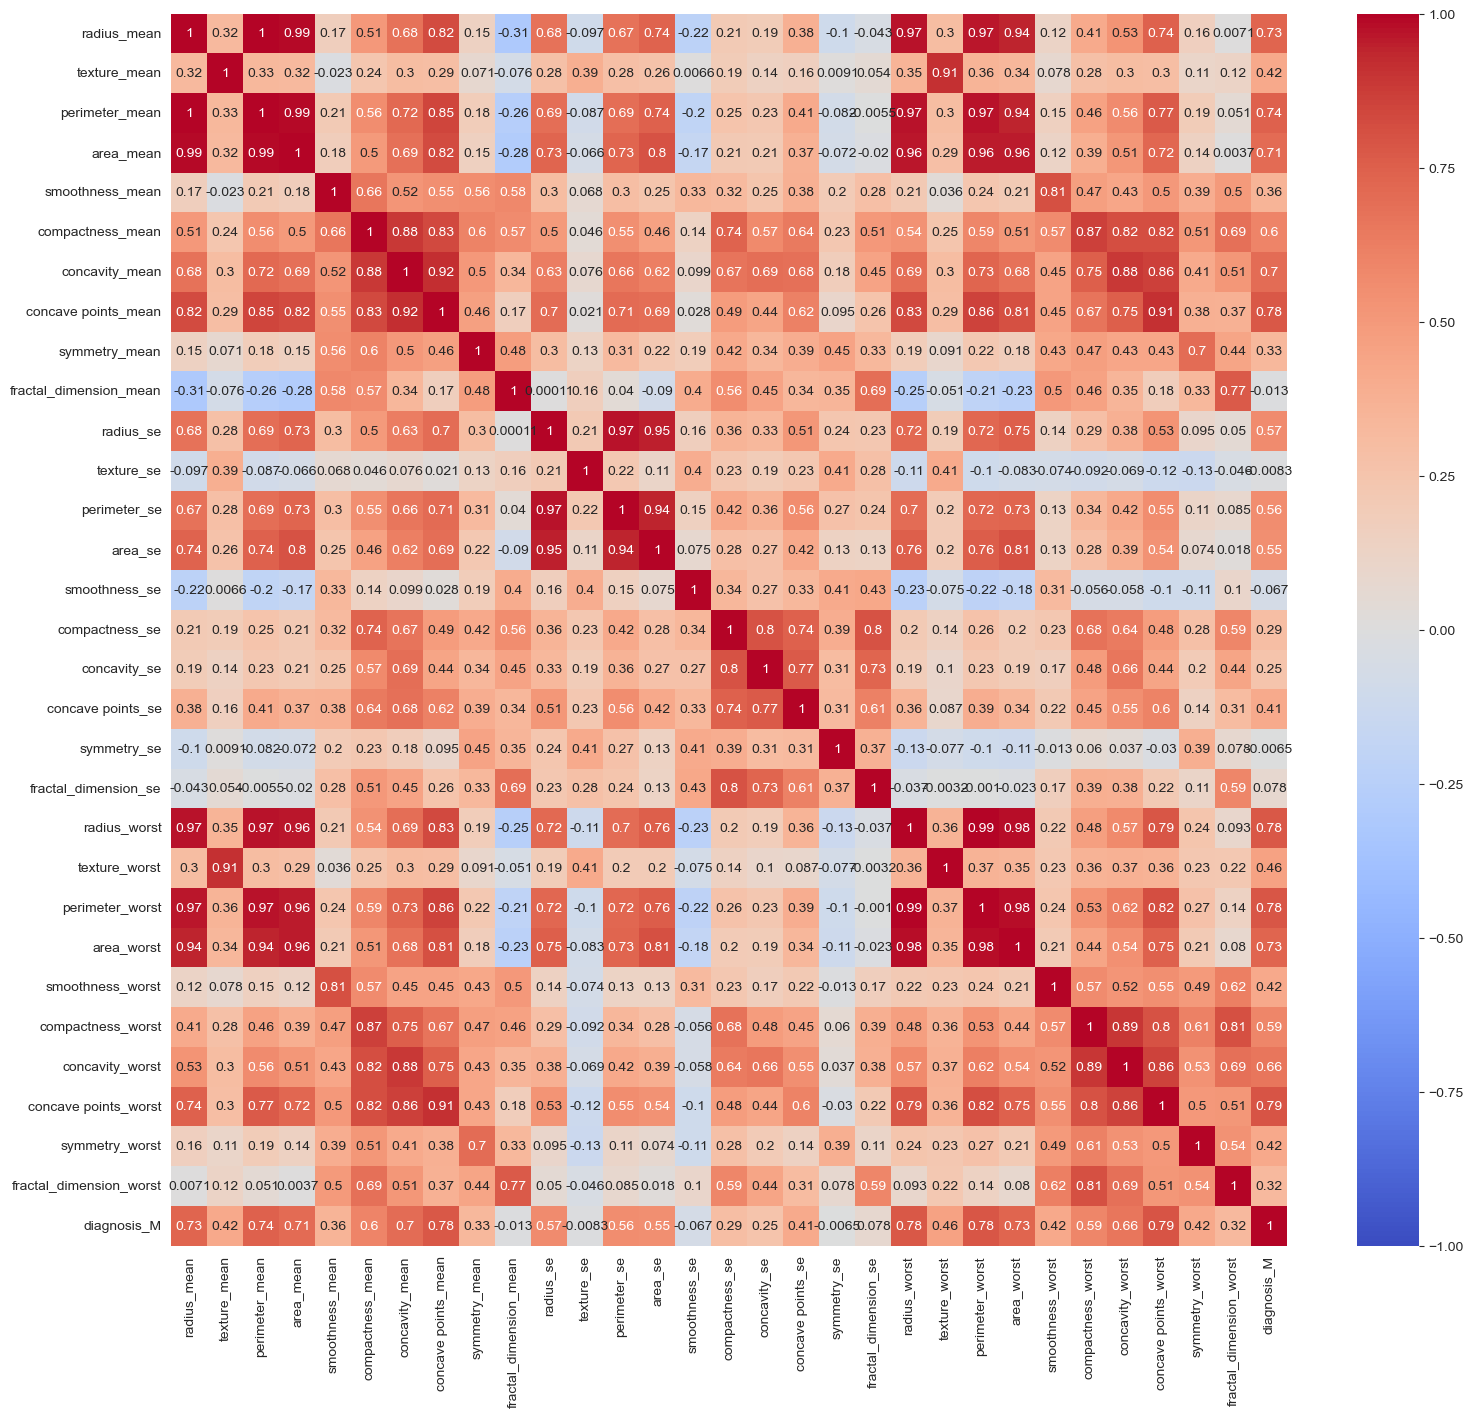

In [23]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(data=corr, cmap='coolwarm', vmax=1, vmin=-1, annot=True, ax=ax)

In [24]:
dataset.drop(columns=['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se'], axis=1, inplace=True)

In [25]:
cols_to_normalize = dataset.drop(columns=['diagnosis_M']).columns

In [26]:
from sklearn.preprocessing import power_transform

for col in cols_to_normalize:
    power_transform(dataset[[col]], copy=False)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in cols_to_normalize:
    dataset[col] = scaler.fit_transform(dataset[[col]])

<AxesSubplot: xlabel='perimeter_mean', ylabel='Count'>

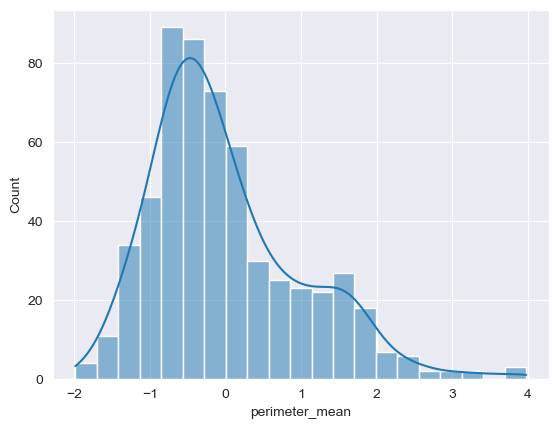

In [28]:
sns.histplot(dataset['perimeter_mean'], kde=True)

In [29]:
X = dataset.drop(['diagnosis_M'], axis=1)
Y = dataset['diagnosis_M']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [100]:
class LogisticRegression:
    def __init__(self,lr = 0.01):
        self.N = 1
        self.coeff = []
        self.features = []
        self.predicted = []
        self.learning_rate = lr
    def sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y):
        self.N = x.shape[1]
        self.features = x.values.tolist()
        self.predicted = y.values.tolist()
        temp_coeff = []
        for i in range(self.N):
            self.coeff.append(np.random.uniform(0,0.5))
        for i in self.coeff:
            temp_coeff.append(i)
        for i in range(self.N):
            temp_coeff[0] += -2 * (self.predicted[i] - (
                    self.coeff[0] + self.coeff[1] * self.features[i][0] + self.coeff[2] * self.features[i][1]))
            for j in range(1, len(temp_coeff)):
                temp_coeff[j] += -2 * self.features[i][j - 1] * (self.predicted[i] - (
                        self.coeff[0] + self.coeff[1] * self.features[i][j - 1] + self.coeff[1] * self.features[i][1]))
        for i in range(len(temp_coeff)):
            self.coeff[0] = self.coeff[0] - (1 / float(self.N)) * temp_coeff[i] * self.learning_rate

    def predict_one(self, x_test_row):
        self.features = x_test_row
        z = self.coeff[0]
        for i in range(1, len(self.coeff)):
            z += self.coeff[i] * self.features[i - 1]
        pred = self.sigmoid_function(z)
        if pred >= 0.5:
            return 1
        else:
            return 0
    def predict(self,x_test):
        prediction = []
        x_test = x_test.values.tolist()
        for i in x_test:
            prediction.append(self.predict_one(i))
        return prediction

In [101]:
model_log =  LogisticRegression()
model_log.fit(x_train,y_test)

In [102]:
y_predicted = model_log.predict(x_test)

In [103]:
y_predicted

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0]

In [104]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.91      0.96      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_predicted2 = model.predict(x_test)

In [89]:
print(metrics.classification_report(y_test,y_predicted2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.98      0.98      0.98        45

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

